### model learnig
- CNN, VGG16 model

In [1]:
import torch
from torch.utils.data import DataLoader

from torchinfo import summary

import multi_class_func as work

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
train_dataset, test_dataset, val_dataset = work.make_dataset()

In [4]:
vgg_model = work.VGG16Model()

In [5]:
vgg_model = vgg_model.to(device)

In [6]:
print(vgg_model)
summary(vgg_model, input_size=(1, 3, 224, 224))

VGG16Model(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding

Layer (type:depth-idx)                   Output Shape              Param #
VGG16Model                               [1, 80]                   --
├─Sequential: 1-1                        [1, 80]                   --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─BatchNorm2d: 2-2                  [1, 64, 224, 224]         128
│    └─ReLU: 2-3                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-4                       [1, 64, 224, 224]         36,928
│    └─BatchNorm2d: 2-5                  [1, 64, 224, 224]         128
│    └─ReLU: 2-6                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-7                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        73,856
│    └─BatchNorm2d: 2-9                  [1, 128, 112, 112]        256
│    └─ReLU: 2-10                        [1, 128, 112, 112]        --
│    └─Conv2d: 2-11                      [1, 128, 112, 112]        147,

In [7]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

In [8]:
loss_dict, score_dict = work.training(vgg_model, train_loader, val_loader, 100, 0.001)

c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:358: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.c

saved first


c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.a

[    5/  100]  [Train]         loss: 1.931812, score: 0.008231
[    5/  100]  [Validation]    loss: 2.130670, score: 0.007548


c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.a

[   10/  100]  [Train]         loss: 1.506822, score: 0.014072
[   10/  100]  [Validation]    loss: 1.881040, score: 0.013624


c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.a

[   15/  100]  [Train]         loss: 1.270837, score: 0.017301
[   15/  100]  [Validation]    loss: 1.809698, score: 0.017204


c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.a

[   20/  100]  [Train]         loss: 1.041379, score: 0.019866
[   20/  100]  [Validation]    loss: 0.591272, score: 0.019629


c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\sjth0\OneDrive\문서\Python Scripts\사전교육\model_h\multi_class_func.py:387: FutureWarning: `torch.cuda.amp.a

[   25/  100]  [Train]         loss: 0.897859, score: 0.021547
[   25/  100]  [Validation]    loss: 0.928755, score: 0.021644
성능 및 손실의 개선이 없어서 학습을 중단합니다.

[   25/  100]  [Train]         loss: 0.897859, score: 0.021547
[   25/  100]  [Validation]    loss: 0.928755, score: 0.021644


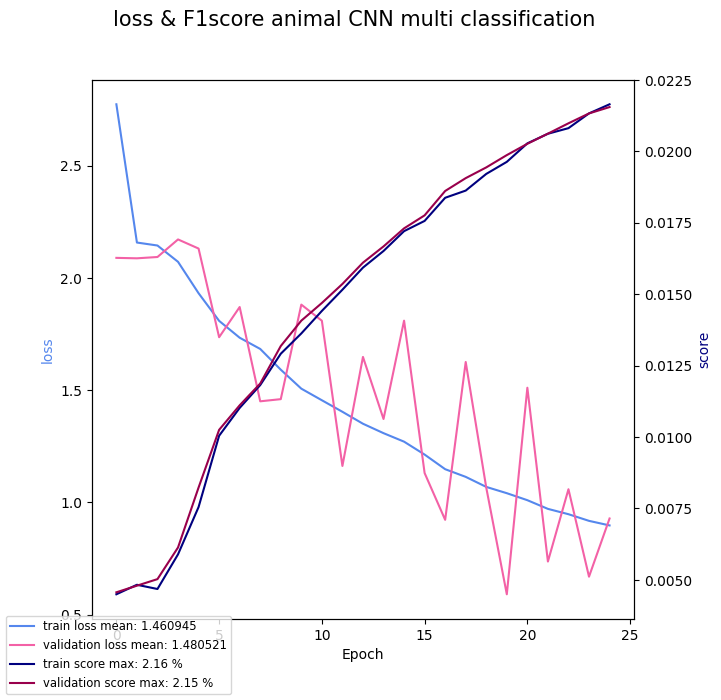

In [9]:
work.draw_two_plot(loss_dict, score_dict, 'loss & F1score')